In [1]:
#Load all used libraries
import numpy as np 
import pandas as pd

from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn import preprocessing

import matplotlib.pyplot  as plt
import seaborn as sns

from sklearn.metrics import adjusted_rand_score


In [2]:
#load iris dataset
irisDF = pd.read_csv("Iris.csv")
#enc = LabelEncoder()
#irisDF["Species"] = enc.fit_transform(irisDF["Species"])

# We drop "Id" column as it is not needed
irisDF = irisDF.drop(columns = ["Id"])
irisDF.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


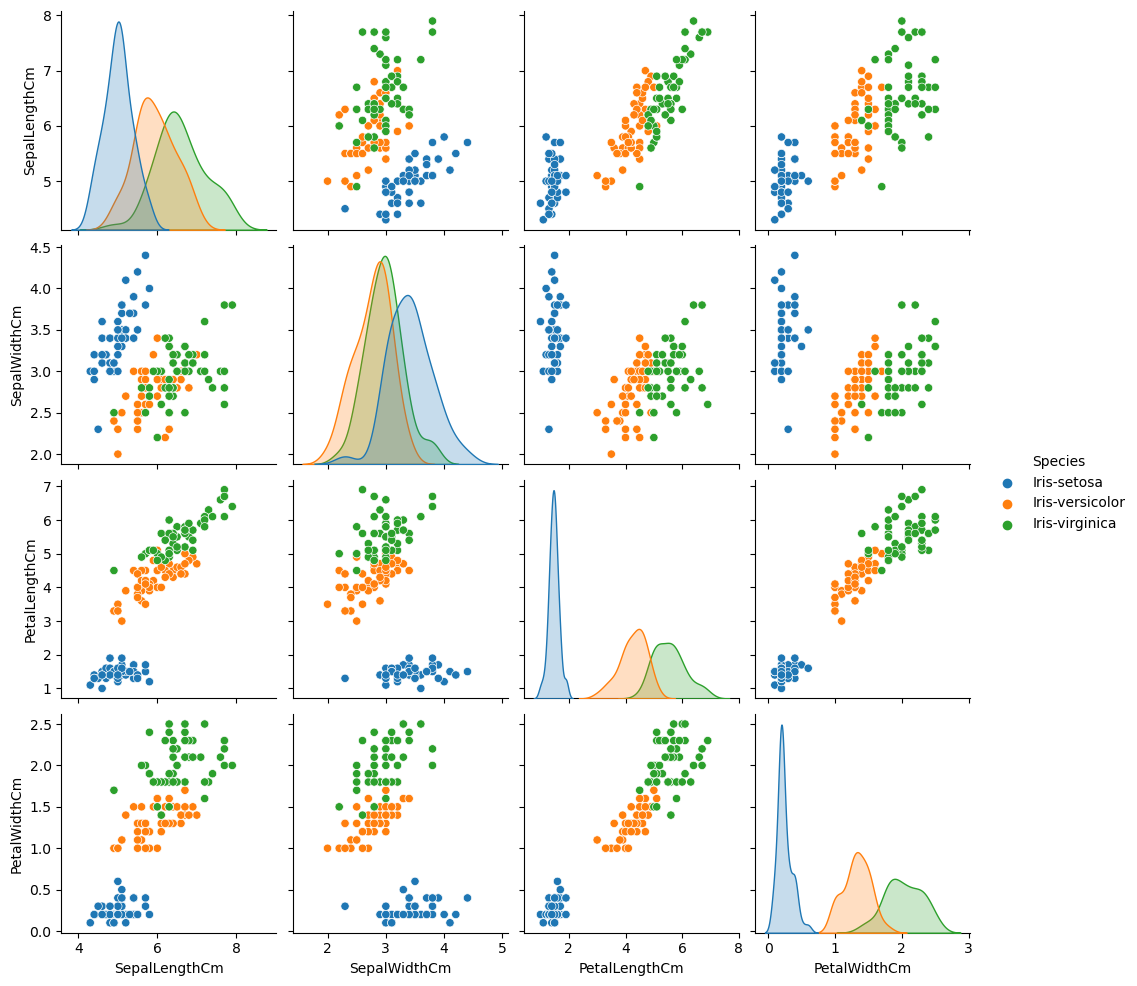

In [3]:
sns.color_palette("pastel")
sns.pairplot(irisDF,hue='Species')
plt.show()

In [47]:
#features
x = irisDF.iloc[:,0:4]

#label
y = irisDF.iloc[:,-1]

In [48]:
print(x.sample(5))
print(y.sample(5))

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
119            6.0           2.2            5.0           1.5
95             5.7           3.0            4.2           1.2
56             6.3           3.3            4.7           1.6
18             5.7           3.8            1.7           0.3
16             5.4           3.9            1.3           0.4
142    Iris-virginica
17        Iris-setosa
116    Iris-virginica
111    Iris-virginica
6         Iris-setosa
Name: Species, dtype: object


In [6]:
#Standardize the data so every feature have equal importance

scaler = preprocessing.StandardScaler()
scaler.fit(x)
x_scaled_array = scaler.transform(x)
x_scaled = pd.DataFrame(x_scaled_array, columns = x.columns)

x_scaled.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
101,-0.052506,-0.819166,0.762759,0.922064
50,1.401508,0.337848,0.535296,0.264699
42,-1.748856,0.337848,-1.398138,-1.312977
137,0.674501,0.106445,0.990221,0.790591
26,-1.021849,0.800654,-1.227541,-1.050031


In [31]:
#Finding the optimal epsilon value using the elbow method
neigh = NearestNeighbors(n_neighbors =5)
nbrs = neigh.fit(x_scaled)
distances, indices = nbrs.kneighbors(x_scaled)
distances = np.sort(distances, axis = 0)
distances = distances[:,1]


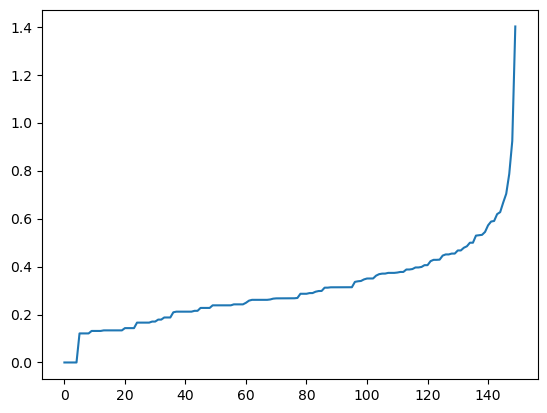

In [32]:
plt.plot(distances)
plt.show()

# We can see that the point of maximum curvature is at 0.6.
# Thus, we set eps to 0.6
# As for min number of samples, if we do not have the domain knowledge, we can set the minimum number of samples to
# greater than or equal to the number of features.
# Thus, we set our min_samples to 5.

In [33]:
dbscan = DBSCAN(eps=0.6,min_samples=5)
y_pred = dbscan.fit_predict(x_scaled)

In [34]:
dbscan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [42]:
np.unique(dbscan.labels_)

array([-1,  0,  1], dtype=int64)

In [43]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.columns=['pred_label']

val = pd.concat([x_scaled,y_pred_df],axis=1)

print(val)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  pred_label
0        -0.900681      1.032057      -1.341272     -1.312977           0
1        -1.143017     -0.124958      -1.341272     -1.312977           0
2        -1.385353      0.337848      -1.398138     -1.312977           0
3        -1.506521      0.106445      -1.284407     -1.312977           0
4        -1.021849      1.263460      -1.341272     -1.312977           0
..             ...           ...            ...           ...         ...
145       1.038005     -0.124958       0.819624      1.447956           1
146       0.553333     -1.281972       0.705893      0.922064           1
147       0.795669     -0.124958       0.819624      1.053537           1
148       0.432165      0.800654       0.933356      1.447956           1
149       0.068662     -0.124958       0.762759      0.790591           1

[150 rows x 5 columns]


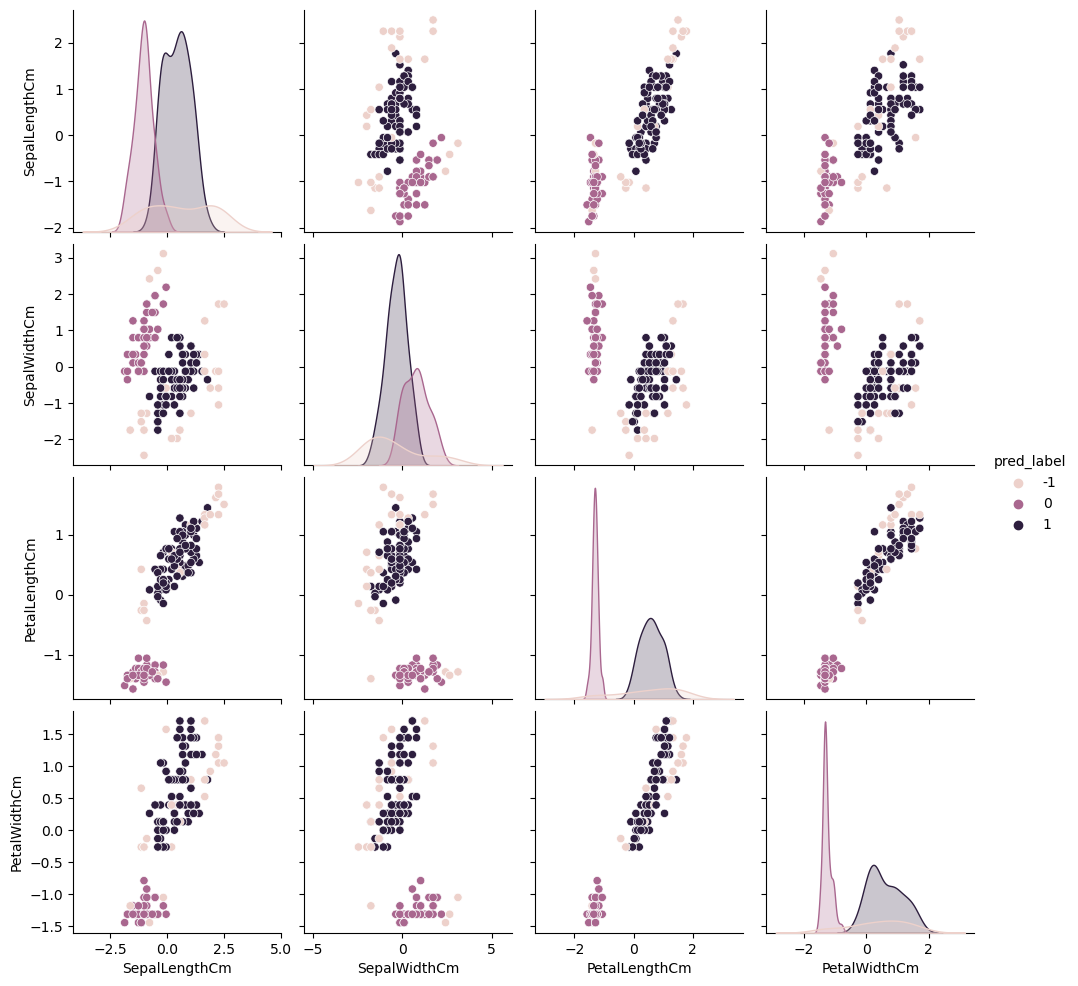

In [40]:
sns.color_palette("pastel")
sns.pairplot(val,hue='pred_label')
plt.show()

In [44]:
# Rand index of 1 indicates a perfect matching of clusters.
# Here we have a score of 0.47.
# Comparing the original and DBSCAN plots, we can see that DBSCAN is unable
# to differentiate the species versicolor and virginica, as they have very similar features.
adjusted_rand_score(y, y_pred)

0.4706267335681117